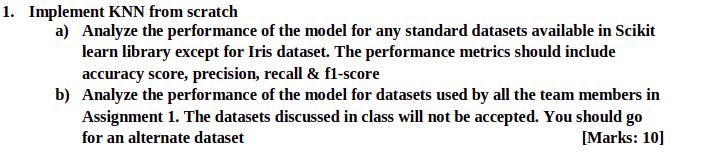

In [2]:
import numpy as np

In [3]:
def euc_dist(p1,p2):
    #calculating dist between two points by l2 norm
    return np.linalg.norm(p1-p2)
    

In [18]:
from tqdm import tqdm

def predict(train,y,inp,k):
    labels = []
    for i in tqdm(inp):
        dist = []
        item = np.array(i)
        for j in range(len(train)):
            dist.append(euc_dist(np.array(train[j,:]),item))
        dist = np.array(dist)
        #sorting the dist array
        dist = np.argsort(dist)
        #taking the first k elements
        dist = dist[:k]
        #taking the labels of the k nearest neighbours
        labels.append(y[dist])
    return labels

def accuracy(y_pred,y_test):
    #calculating the accuracy
    return np.sum(y_pred==y_test)/len(y_test)
            


In [19]:
import pandas as pd 
X = pd.read_csv("/home/kalyan/gitrepo/alma-mater/Sem3/PML/Dropout_Academic Success - Sheet1.csv")

#dropping the first column
X = X.drop(X.columns[0],axis=1)

#converting the dataframe to numpy array
X = X.to_numpy()

from sklearn.model_selection import train_test_split
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X[:,:-1],X[:,-1],test_size=0.2,random_state=42)


In [20]:
#predicting the labels
y_pred = predict(X_train,y_train,X_test,5)
#calculating the accuracy
acc = accuracy(y_pred,y_test)
print("Accuracy is ",acc)

100%|██████████| 885/885 [00:22<00:00, 38.54it/s]

Accuracy is  0.0



/tmp/ipykernel_467465/506156542.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return np.sum(y_pred==y_test)/len(y_test)


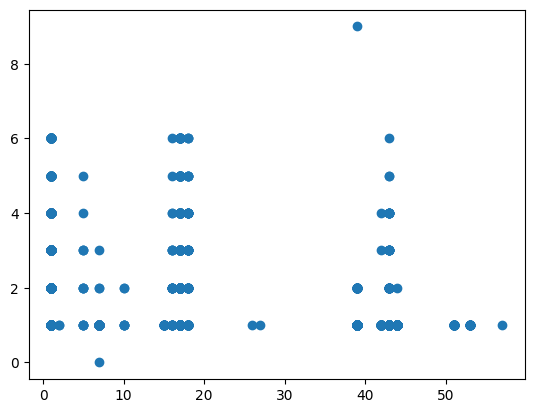

In [23]:
#visualizing the data
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0],X_train[:,1])
plt.show()

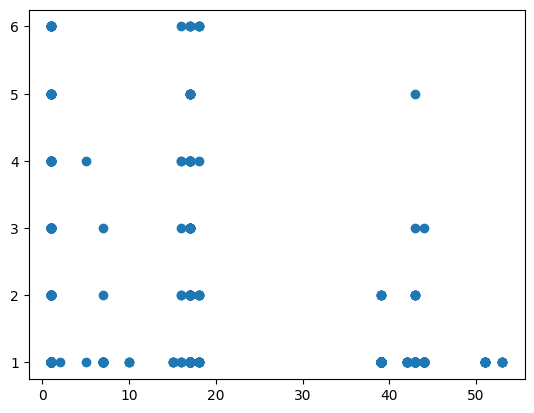

In [25]:
#visualizing the data of test set
plt.scatter(X_test[:,0],X_test[:,1])
